In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Groceries_dataset.csv')

In [3]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [4]:
df.shape

(38765, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] =df['Date'].dt.weekday
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_2248\933206236.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df

,Member_number,Date,itemDescription,weekday,month,year
0,1808,2015-07-21,tropical fruit,1,7,2015
1,2552,2015-05-01,whole milk,4,5,2015
2,2300,2015-09-19,pip fruit,5,9,2015
3,1187,2015-12-12,other vegetables,5,12,2015
4,3037,2015-01-02,whole milk,4,1,2015
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,6,8,2014
38761,2022,2014-02-23,candy,6,2,2014
38762,1097,2014-04-16,cake bar,2,4,2014
38763,1510,2014-03-12,fruit/vegetable juice,2,3,2014


In [11]:
df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','Feburary','March','April','May','June','July','August','September','October','November','December'),inplace=True)

In [12]:
df.weekday.replace((0,1,2,3,4,5,6),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),inplace=True)

In [13]:
df

,Member_number,Date,itemDescription,weekday,month,year
0,1808,2015-07-21,tropical fruit,Tuesday,July,2015
1,2552,2015-05-01,whole milk,Friday,May,2015
2,2300,2015-09-19,pip fruit,Saturday,September,2015
3,1187,2015-12-12,other vegetables,Saturday,December,2015
4,3037,2015-01-02,whole milk,Friday,January,2015
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,Sunday,August,2014
38761,2022,2014-02-23,candy,Sunday,Feburary,2014
38762,1097,2014-04-16,cake bar,Wednesday,April,2014
38763,1510,2014-03-12,fruit/vegetable juice,Wednesday,March,2014


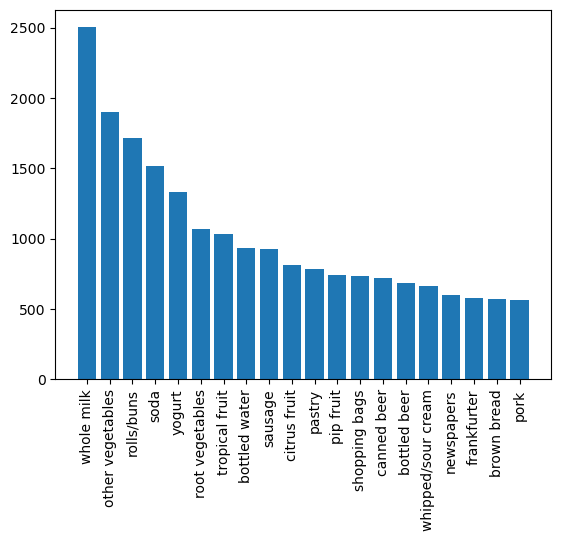

In [14]:
data_item=df.itemDescription.value_counts()
x=data_item.index[0:20]
y=data_item.values[0:20]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

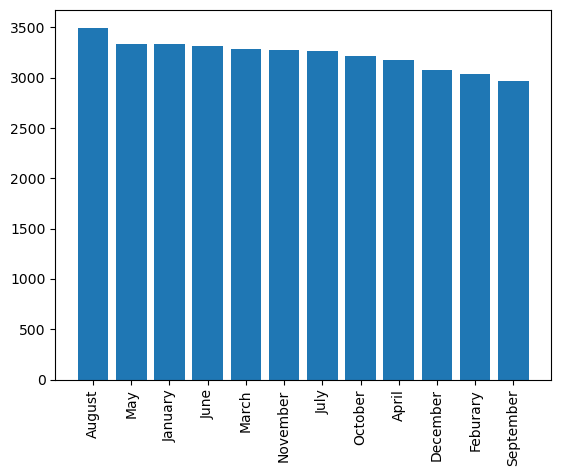

In [15]:
data_month = df.month.value_counts()
x = data_month.index
y = data_month.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

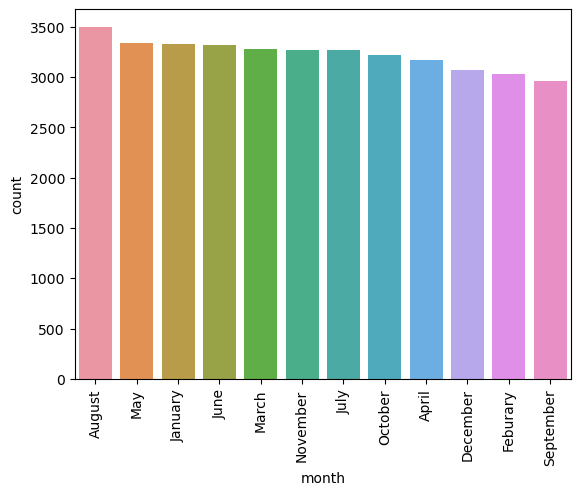

In [16]:
sns.countplot(x=df['month'],order=df.month.value_counts().index)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='weekday', ylabel='count'>

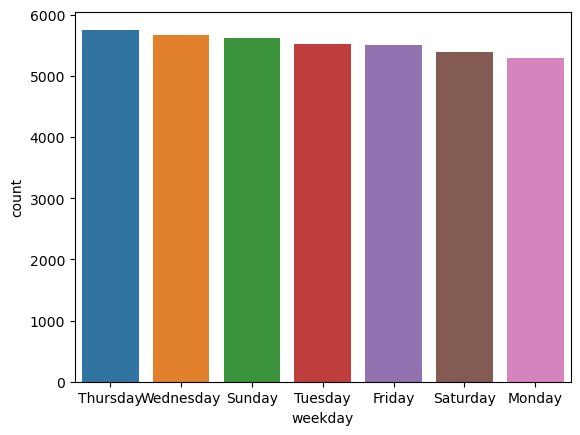

In [17]:
sns.countplot(x=df.weekday,order=df.weekday.value_counts().index)

<Axes: xlabel='year', ylabel='count'>

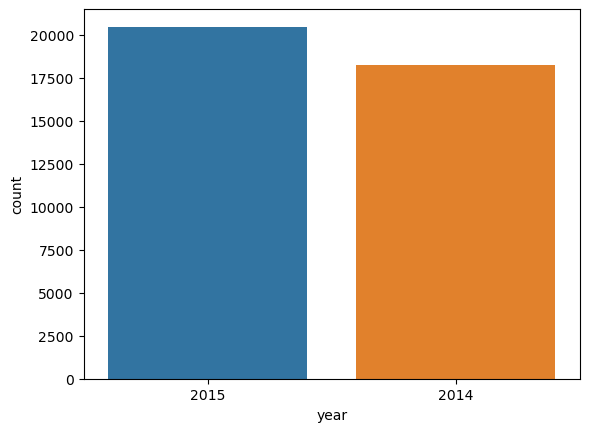

In [18]:
sns.countplot(x=df.year,order=df.year.value_counts().index)

In [19]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [20]:
from mlxtend.frequent_patterns import apriori,association_rules

In [21]:
final_data = df.groupby(['Member_number','itemDescription'])['itemDescription'].count().reset_index(name='count')

In [22]:
final_data

,Member_number,itemDescription,count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [23]:
data_final = final_data.pivot_table(index='Member_number',columns='itemDescription',values='count').fillna(0.0)
data_final

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def change(s):
    if s<=0.0:
        return 0
    elif s>=1.0:
        return 1
market_analaysis = data_final.applymap(change)

In [25]:
market_analaysis

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
frequent_items  = apriori(market_analaysis,min_support=0.05,low_memory=False,use_colnames=True)
frequent_items

D:\Gayatri\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(other vegetables, tropical fruit, whole milk)"
161,0.071832,"(other vegetables, whole milk, yogurt)"
162,0.065162,"(whole milk, soda, rolls/buns)"
163,0.065931,"(whole milk, rolls/buns, yogurt)"


In [119]:
association_rules(frequent_items,metric='confidence',min_threshold=0.1,support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,0.005773,1.017719,0.182309
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
2,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
...,...,...,...,...,...,...,...,...,...,...
255,"(soda, whole milk)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,0.011630,1.120247,0.251899
256,"(whole milk, yogurt)",(soda),0.150590,0.313494,0.054387,0.361158,1.152042,0.007178,1.074611,0.155374
257,(soda),"(whole milk, yogurt)",0.313494,0.150590,0.054387,0.173486,1.152042,0.007178,1.027702,0.192243
258,(yogurt),"(soda, whole milk)",0.282966,0.151103,0.054387,0.192203,1.271999,0.011630,1.050879,0.298223
